In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [5]:
# Jensenshannon_df = pd.read_csv('Jensenshannon_df.csv', index_col = 0) # for balanced dataset measuring distinctiveness
Jensenshannon_df = pd.read_csv('Jensenshannon_df.csv', index_col = 0)
cos_sim_cat = pd.read_csv('cos_sim_cat_b.csv') # used balanced dataset for measuring coherence using cosine similarity
tfidf_df = pd.read_csv('tfidf_dataframe_2.csv') # containing all columns for control variables
tfidf_df['tfidf'] = tfidf_df['tfidf'].map(lambda x:eval(x))

In [187]:
# correlation between dis and count of campaigns

# a = tfidf_df.groupby(['category_name'])['selection'].count().sort_values(ascending = False)
# b = df_dis_coh.loc[:,('category','jenshan')].sort_values('jenshan',ascending = False)
# c = pd.merge(a, b, left_on='category_name', right_on='category', how='left')
# c.loc[:,('selection', 'jenshan')].corr()

In [6]:
tfidf_df['launched_at'] = pd.to_datetime(tfidf_df['launched_at']).dt.date
tfidf_df['successful_at'] = pd.to_datetime(tfidf_df['successful_at']).dt.date
tfidf_df['failed_at'] = pd.to_datetime(tfidf_df['failed_at']).dt.date

In [7]:
a = []
for cat in cos_sim_cat.category:
    a.append(Jensenshannon_df.loc[cat].sum()/91)

In [8]:
df_dis_coh = cos_sim_cat.copy()
df_dis_coh['jenshan'] = a
df_dis_coh

,category,cosim,jenshan
0,Documentary,0.288367,0.459616
1,Children's Books,0.340714,0.467835
2,World Music,0.375300,0.496994
3,Musical,0.465480,0.536412
4,Hip-Hop,0.363286,0.489029
...,...,...,...
81,Electronic Music,0.376587,0.499341
82,Animation,0.338155,0.482894
83,Accessories,0.343276,0.507135
84,Film & Video,0.372123,0.497251


In [118]:
# # for using doc2vec instead of jennshann for distinctiveness
# Jensenshannon_df = pd.read_csv('distinctiveness_df.csv')
# df_dis_coh = cos_sim_cat.merge(Jensenshannon_df[['category', 'distinctiveness']], on='category', how='left')
# df_dis_coh

In [119]:
# 'tfidf_mean_top_10_norm' variable in the following code must be adjust accordingly!
# "tfidf_mean_top_10_log" OR "tfidf_mean_top_10_norm" OR "tfidf_mean_10_per_norm"

# # results = result.rename(columns={'jenshan': 'distinctiveness', 'cosim': 'coherence', 'tfidf_mean_top_10_norm': 'novelty'})

In [9]:
# using TFIDF for novelty score with normalization with description length

# tfidf_df['tfidf_log'] = tfidf_df['tfidf'].apply(lambda x: [np.log10(i) for i in x])

def count_words(text):
    return len(text.split())
tfidf_df['des_length'] = tfidf_df['description'].apply(count_words)

def get_top_10(lst):
    return sorted(lst, reverse=True)[:10]
tfidf_df['top_10_values'] = tfidf_df['tfidf'].apply(get_top_10)
tfidf_df['tfidf_mean_top_10'] = tfidf_df.top_10_values.apply(lambda x: sum(x)/len(x))
tfidf_df['tfidf_mean_top_10_norm'] = tfidf_df['tfidf_mean_top_10'] / np.log10(tfidf_df['des_length'])

In [121]:
# tfidf_df['tfidf_log'] = tfidf_df['tfidf'].apply(lambda x: [np.log10(i) for i in x])

# def count_words(text):
#     return len(text.split())
# tfidf_df['des_length'] = tfidf_df['description'].apply(count_words)

# def mean_top_10_percent(tfidf_scores): 
#     sorted_scores = sorted(tfidf_scores, reverse=True)
#     num_top_values = max(1, int(np.ceil(len(sorted_scores) * 0.20)))
#     mean_top_values = np.mean(sorted_scores[:num_top_values])
#     return mean_top_values

# tfidf_df['tfidf_mean_10_per'] = tfidf_df.apply(lambda row: mean_top_10_percent(row['tfidf']), axis=1)
# tfidf_df['tfidf_mean_10_per_norm'] = tfidf_df['tfidf_mean_10_per'] / np.log10(tfidf_df['des_length'])

In [10]:
result = pd.merge(tfidf_df, df_dis_coh, left_on='category_name', right_on='category', how='left')
# result.head()

In [123]:
# # adjust accordingly!

# result.drop(columns=['country'], inplace=True)
# result.drop(columns=['selection'], inplace=True)
# result.drop(columns=['category'], inplace=True)
# result.drop(columns=['noun_phrases'], inplace=True)
# result.drop(columns=['merged_noun_phrases'], inplace=True)
# result.drop(columns=['length'], inplace=True)
# result.drop(columns=['tfidf'], inplace=True)
# result.drop(columns=['canceledAt'], inplace=True)
# result.drop(columns=['selection_token'], inplace=True)
# result.drop(columns=['pledged'], inplace=True)
# result.drop(columns=['backers_count'], inplace=True)
# result.drop(columns=['deadline'], inplace=True)
# result.drop(columns=['duration'], inplace=True)
# result.drop(columns=['top_10_values'], inplace=True)
# result.drop(columns=['tfidf_mean_top_10'], inplace=True)

In [11]:
results = result.rename(columns={'jenshan': 'distinctiveness', 'cosim': 'coherence', 'tfidf_mean_top_10_norm': 'novelty'})

In [12]:
# control variable sine-cosine age
# (results['launched_at'].max() - results['launched_at'].min()).days
# 3520 days

results['day_number'] = (results['launched_at'] - results['launched_at'].min())
results['day_number'] = pd.to_timedelta(results['day_number'])
results['day_number'] = results['day_number'].dt.days
results['day_number'] = results['day_number'] + 1

results['annual_cycles_sine'] = np.sin(2 * np.pi * results['day_number'] / 365)
results['annual_cycles_cosine'] = np.cos(2 * np.pi * results['day_number'] / 365)

In [13]:
# control variable goal
results['goal_log'] = np.log10(results['goal'])

In [14]:
# control variable parent_category
# in the model code

In [15]:
# control variable length of description
results['log_des_length'] = np.log10(results['des_length']) 

In [16]:
# control variable length of description
results['campaign_duration'] = results.apply(
    lambda row: (row['successful_at'] - row['launched_at']).days 
    if pd.notna(row['successful_at']) 
    else (row['failed_at'] - row['launched_at']).days, axis=1)

In [130]:
# results.to_csv('results.csv')

In [17]:
results2 = results.copy()

In [18]:
# standardization
scaler = StandardScaler()
columns_to_standardize = ['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length','campaign_duration']
results2[columns_to_standardize] = scaler.fit_transform(results2[columns_to_standardize])

In [19]:
results2['coherence2'] = results2['coherence']**2
results2['distinctiveness2'] = results2['distinctiveness']**2
results2['novelty2'] = results2['novelty']**2

results2['dis_coh_interaction'] = results2['distinctiveness'] * results2['coherence']
results2['dis_nov_interaction'] = results2['distinctiveness'] * results2['novelty']
results2['nov_coh_interaction'] = results2['novelty'] * results2['coherence']

# # this is a new code to address high multicollinearity
# results2['coherence_centered'] = results2['coherence'] - results2['coherence'].mean()
# results2['distinctiveness_centered'] = results2['distinctiveness'] - results2['distinctiveness'].mean()
# results2['novelty_centered'] = results2['novelty'] - results2['novelty'].mean()
# results2['coherence2'] = results2['coherence_centered']**2
# results2['distinctiveness2'] = results2['distinctiveness_centered']**2
# results2['novelty2'] = results2['novelty_centered']**2
# results2['dis_coh_interaction'] = results2['distinctiveness_centered'] * results2['coherence_centered']
# results2['dis_nov_interaction'] = results2['distinctiveness_centered'] * results2['novelty_centered']
# results2['nov_coh_interaction'] = results2['novelty_centered'] * results2['coherence_centered']

In [20]:
# checking multicollinearity
# X = results2[['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine',
#              'goal_log', 'log_des_length', 'campaign_duration', 'coherence2', 'distinctiveness2',
#              'novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']]
X = results2[['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine',
             'goal_log', 'log_des_length', 'campaign_duration']]
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

               Variable       VIF
0                 const  1.000000
1       distinctiveness  1.601877
2             coherence  1.661464
3               novelty  1.340173
4    annual_cycles_sine  1.003071
5  annual_cycles_cosine  1.001620
6              goal_log  1.125699
7        log_des_length  1.392187
8     campaign_duration  1.044404


In [21]:
corr_table = results2[['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length', 'campaign_duration',
         'coherence2', 'distinctiveness2', 'novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction', 'success']].corr()
corr_table.iloc[:,-1]

distinctiveness        -0.065236
coherence              -0.087637
novelty                 0.120411
annual_cycles_sine     -0.013147
annual_cycles_cosine    0.017386
goal_log               -0.216823
log_des_length          0.248552
campaign_duration      -0.120551
coherence2             -0.014232
distinctiveness2       -0.079411
novelty2                0.040028
dis_coh_interaction    -0.093538
dis_nov_interaction     0.042736
nov_coh_interaction    -0.050827
success                 1.000000
Name: success, dtype: float64

In [54]:
# # printing correlation table
# corr_table = results2[['success', 'distinctiveness', 'coherence', 'novelty', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction',
#                        'coherence2', 'distinctiveness2', 'novelty2','annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length', 'campaign_duration']].corr()

# corr_table = corr_table.applymap(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

# new_indices = list(range(1, corr_table.shape[1] + 1))
# new_columns = ['1. Success', '2. Distinctiveness', '3. Coherence', '4. Novelty', '5. Distinctiveness*Coherence', '6. Distinctiveness*Novelty',
#                '7. Coherence*Novelty', '8. Coherence2', '9. Distinctiveness2', '10. Novelty2','11. Annual cycles (sine)', '12. Annual cycles (cosine)',
#                '13. Funding goal', '14. Length', '15. Duration']

# corr_table.columns = new_columns
# corr_table.index = new_indices

# corr_table = corr_table.where(np.triu(np.ones(corr_table.shape), k=0).astype(bool), "")

# corr_table = corr_table.iloc[::-1]
# corr_table

In [55]:
# # printing statistics table
# df = results2.loc[:, ['success', 'distinctiveness', 'coherence', 'novelty', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction',
#                                'coherence2', 'distinctiveness2', 'novelty2','annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length',
#                                'campaign_duration']]

# scaler = StandardScaler()
# cols = ['dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction', 'coherence2', 'distinctiveness2', 'novelty2']
# df[cols] = scaler.fit_transform(df[cols])


# stats_table = df.describe()
# stats_table = stats_table.applymap(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)
# stats_table

In [56]:
# # capitalite names for PDP interaction plots
# results2 = results2.rename(columns={"distinctiveness": "Distinctiveness", "coherence": "Coherence", "novelty": "Novelty"})

In [26]:
# # Logistic Regression

# X = results2[['annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length',
#              'campaign_duration', 'parentCategory_name']]
# X = pd.get_dummies(X, columns=['parentCategory_name'], drop_first = True)
# y = results2['success']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# continuous_columns = ['annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length', 'campaign_duration']
# dummy_columns = [col for col in X_train.columns if col not in continuous_columns]
# sc = StandardScaler()
# X_train_continuous = sc.fit_transform(X_train[continuous_columns])
# X_test_continuous = sc.transform(X_test[continuous_columns])
# X_train_dummy = X_train[dummy_columns].values
# X_test_dummy = X_test[dummy_columns].values
# X_train_scaled = np.hstack((X_train_continuous, X_train_dummy))
# X_test_scaled = np.hstack((X_test_continuous, X_test_dummy))
# all_columns = continuous_columns + dummy_columns
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=all_columns)
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=all_columns)

# # model = LogisticRegression(class_weight='balanced')
# model = LogisticRegression(max_iter=500, C=10, solver='lbfgs', penalty='l2', tol=0.0001, class_weight='balanced')
# model.fit(X_train_scaled_df, y_train)

# y_pred = model.predict(X_test_scaled_df)

# f1 = f1_score(y_test, y_pred)
# print("Logistic Regression F1-Score:", f1)
# print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
# # print(classification_report(y_test, y_pred))

In [22]:
# Logistic Regression

X = results2[['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length',
             'campaign_duration', 'parentCategory_name', 'coherence2', 'distinctiveness2', 'novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']]
X = pd.get_dummies(X, columns=['parentCategory_name'], drop_first = True)
y = results2['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

continuous_columns = ['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length', 'campaign_duration',
                      'coherence2', 'distinctiveness2', 'novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']
dummy_columns = [col for col in X_train.columns if col not in continuous_columns]
sc = StandardScaler()
X_train_continuous = sc.fit_transform(X_train[continuous_columns])
X_test_continuous = sc.transform(X_test[continuous_columns])
X_train_dummy = X_train[dummy_columns].values
X_test_dummy = X_test[dummy_columns].values
X_train_scaled = np.hstack((X_train_continuous, X_train_dummy))
X_test_scaled = np.hstack((X_test_continuous, X_test_dummy))
all_columns = continuous_columns + dummy_columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=all_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=all_columns)

# model = LogisticRegression(class_weight='balanced')
model = LogisticRegression(max_iter=500, C=1, solver='lbfgs', penalty='l2', tol=0.0001, class_weight='balanced')
model.fit(X_train_scaled_df, y_train)

y_pred = model.predict(X_test_scaled_df)

f1 = f1_score(y_test, y_pred)
print("Logistic Regression F1-Score:", f1)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

Logistic Regression F1-Score: 0.7283570510800261
Logistic Regression Accuracy: 0.7136395001150042


In [42]:
# # Logistic Regression

# X = results2[['distinctiveness', 'coherence', 'novelty', 'coherence2', 'distinctiveness2', 'novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']]
# y = results2['success']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# continuous_columns = ['distinctiveness', 'coherence', 'novelty',
#                       'coherence2', 'distinctiveness2', 'novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']
# sc = StandardScaler()
# X_train_continuous = sc.fit_transform(X_train[continuous_columns])
# X_test_continuous = sc.transform(X_test[continuous_columns])
# all_columns = continuous_columns
# X_train_scaled_df = pd.DataFrame(X_train_continuous, columns=all_columns)
# X_test_scaled_df = pd.DataFrame(X_test_continuous, columns=all_columns)

# # model = LogisticRegression(class_weight='balanced')
# model = LogisticRegression(max_iter=500, C=10, solver='lbfgs', penalty='l2', tol=0.0001, class_weight='balanced')
# model.fit(X_train_scaled_df, y_train)

# y_pred = model.predict(X_test_scaled_df)

# f1 = f1_score(y_test, y_pred)
# print("Logistic Regression F1-Score:", f1)
# print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
# # print(classification_report(y_test, y_pred))

Logistic Regression F1-Score: 0.5641785515836266
Logistic Regression Accuracy: 0.5790590099414756


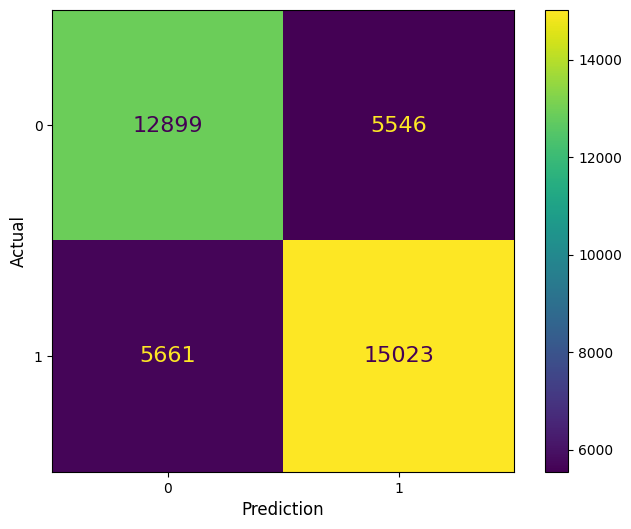

In [45]:
# cm = confusion_matrix(y_test, y_pred)

# fig, ax = plt.subplots(figsize=(8, 6))

# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(ax=ax, text_kw={"fontsize": 16})

# font = {'size': 12}
# plt.xlabel('Prediction', fontdict=font)
# plt.ylabel('Actual', fontdict=font)

# # plt.savefig('CM final LR.jpg', dpi=600)
# plt.show()

In [217]:
# # cross validation f1-score
# continuous_columns = ['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length', 'campaign_duration',
#                       'coherence2', 'distinctiveness2', 'novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']
# dummy_columns = [col for col in X_train.columns if col not in continuous_columns]
# sc = StandardScaler()
# X_continuous = sc.fit_transform(X[continuous_columns])
# X_dummy = X[dummy_columns].values
# X_scaled = np.hstack((X_continuous, X_dummy))
# all_columns = continuous_columns + dummy_columns
# X_scaled_df = pd.DataFrame(X_scaled, columns=all_columns)

# from sklearn.model_selection import StratifiedKFold

# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# scores = cross_val_score(model, X_scaled_df, y, cv=skf, scoring='accuracy')
# scores_f1 = cross_val_score(model, X_scaled_df, y, cv=skf, scoring=f1_scorer)

# print("F1-Score for each fold:", scores_f1)
# print("Average F1-Score:", np.mean(scores_f1))

# print("Accuracy for each fold:", scores)
# print("Average accuracy:", np.mean(scores))

F1-Score for each fold: [0.73001114 0.72816752 0.72265814 0.72833656 0.72727273 0.72497702
 0.72752864 0.72211464 0.72577917 0.73129631]
Average F1-Score: 0.7268141858912689
Accuracy for each fold: [0.71505239 0.7120368  0.70731957 0.71283991 0.7117154  0.70941525
 0.71304437 0.70660397 0.7099264  0.7163668 ]
Average accuracy: 0.7114320839849219


In [23]:
X = results2[['distinctiveness', 'coherence', 'novelty','dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction',
              'coherence2', 'distinctiveness2', 'novelty2', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length',
              'campaign_duration', 'parentCategory_name']]
X = pd.get_dummies(X, columns=['parentCategory_name'], drop_first=True)
y = results2['success']

continuous_columns = ['distinctiveness', 'coherence', 'novelty','dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction',
                      'coherence2', 'distinctiveness2', 'novelty2', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length',
                      'campaign_duration']
dummy_columns = [col for col in X.columns if col not in continuous_columns]
sc = StandardScaler()
X_continuous = sc.fit_transform(X[continuous_columns])
X_dummy = X[dummy_columns].values
X_scaled = np.hstack((X_continuous, X_dummy))
all_columns = continuous_columns + dummy_columns
X_scaled_df = pd.DataFrame(X_scaled, columns=all_columns)

X_scaled_df_with_const = sm.add_constant(X_scaled_df)

logit_model = sm.Logit(y, X_scaled_df_with_const).fit()

coefficients = logit_model.params
p_values = logit_model.pvalues
odds_ratios = np.exp(coefficients)

coef_table = pd.DataFrame({
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios,
    'p-value': p_values
})

print(coef_table)

Optimization terminated successfully.
         Current function value: 0.555811
         Iterations 6
                                  Coefficient  Odds Ratio        p-value
const                                0.132601    1.141795   5.460724e-14
distinctiveness                      0.104448    1.110098   1.013207e-16
coherence                           -0.259380    0.771530   3.647248e-95
novelty                              0.128565    1.137195   6.647845e-46
dis_coh_interaction                 -1.154909    0.315086   0.000000e+00
dis_nov_interaction                  0.058212    1.059940   8.762634e-17
nov_coh_interaction                  0.019022    1.019204   1.651899e-02
coherence2                           0.598238    1.818910   0.000000e+00
distinctiveness2                     0.602366    1.826436   0.000000e+00
novelty2                            -0.091630    0.912443   1.280982e-24
annual_cycles_sine                  -0.041321    0.959521   2.668755e-15
annual_cycles_cosine  

Best threshold: 0.35, F1-score: 0.7594, Accuracy: 0.7032


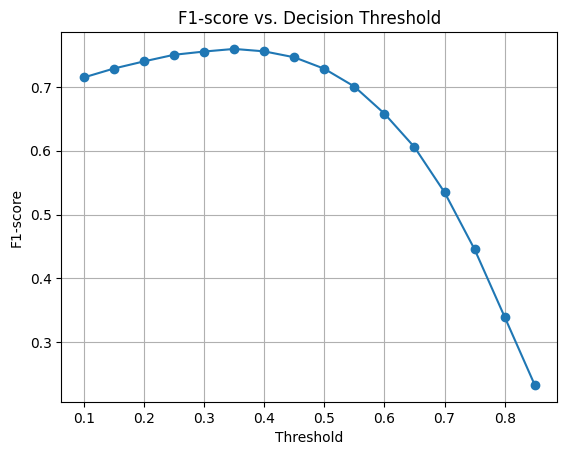

In [265]:
# X = results2[['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length',
#              'campaign_duration', 'parentCategory_name', 'coherence2', 'distinctiveness2', 'novelty2', 
#              'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']]
# X = pd.get_dummies(X, columns=['parentCategory_name'], drop_first=True)
# y = results2['success']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Standardization
# continuous_columns = ['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length',
#                       'campaign_duration', 'coherence2', 'distinctiveness2', 'novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']
# dummy_columns = [col for col in X_train.columns if col not in continuous_columns]

# sc = StandardScaler()
# X_train_continuous = sc.fit_transform(X_train[continuous_columns])
# X_test_continuous = sc.transform(X_test[continuous_columns])

# X_train_dummy = X_train[dummy_columns].values
# X_test_dummy = X_test[dummy_columns].values

# X_train_scaled = np.hstack((X_train_continuous, X_train_dummy))
# X_test_scaled = np.hstack((X_test_continuous, X_test_dummy))

# all_columns = continuous_columns + dummy_columns
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=all_columns)
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=all_columns)

# # Train Logistic Regression Model
# model = LogisticRegression(max_iter=500, C=1, solver='lbfgs', penalty='l2', tol=0.0001, class_weight='balanced')
# model.fit(X_train_scaled_df, y_train)

# # Get predicted probabilities
# y_probs = model.predict_proba(X_test_scaled_df)[:, 1]  # Probabilities for class 1

# # Find the best threshold using F1-score
# thresholds = np.arange(0.1, 0.9, 0.05)
# f1_scores = [f1_score(y_test, (y_probs >= t).astype(int)) for t in thresholds]

# best_threshold = thresholds[np.argmax(f1_scores)]
# best_f1 = max(f1_scores)

# # Final prediction using best threshold
# y_pred_adjusted = (y_probs >= best_threshold).astype(int)

# # Evaluate model performance
# accuracy = accuracy_score(y_test, y_pred_adjusted)

# # Print results
# print(f"Best threshold: {best_threshold:.2f}, F1-score: {best_f1:.4f}, Accuracy: {accuracy:.4f}")

# # Plot F1-score vs. Threshold
# plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
# plt.xlabel('Threshold')
# plt.ylabel('F1-score')
# plt.title('F1-score vs. Decision Threshold')
# plt.grid(True)
# plt.show()


In [103]:
# the following two codes are applied to exclude interaction terms from stnadardization after computation
# (all data is standardized - then interaction terms are computed - then all other columns except for interaction terms are standardized again which is not affecting the columns at all)
# in the excel table it is named "different approach"

# X = results2[['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length',
#              'campaign_duration', 'parentCategory_name', 'coherence2', 'distinctiveness2', 'novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']]
# X = pd.get_dummies(X, columns=['parentCategory_name'], drop_first=True)
# y = results2['success']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # normalization
# # Define columns to standardize (excluding the specified columns)
# continuous_columns = ['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length', 'campaign_duration']

# # Define columns to leave unstandardized
# unscaled_columns = ['coherence2', 'distinctiveness2', 'novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']

# # Get dummy columns
# dummy_columns = [col for col in X_train.columns if col not in (continuous_columns + unscaled_columns)]

# # Standardize only the continuous columns
# sc = StandardScaler()
# X_train_continuous = sc.fit_transform(X_train[continuous_columns])
# X_test_continuous = sc.transform(X_test[continuous_columns])

# # Get the unscaled columns and dummy variables as is
# X_train_unscaled = X_train[unscaled_columns].values
# X_test_unscaled = X_test[unscaled_columns].values
# X_train_dummy = X_train[dummy_columns].values
# X_test_dummy = X_test[dummy_columns].values

# # Combine all parts
# X_train_scaled = np.hstack((X_train_continuous, X_train_unscaled, X_train_dummy))
# X_test_scaled = np.hstack((X_test_continuous, X_test_unscaled, X_test_dummy))

# # Create column names list for the final DataFrame
# all_columns = continuous_columns + unscaled_columns + dummy_columns

# # Create DataFrames
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=all_columns)
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=all_columns)

# # model = LogisticRegression(class_weight='balanced')
# model = LogisticRegression(max_iter=500, C=1, solver='lbfgs', penalty='l2', tol=0.0001)
# model.fit(X_train_scaled_df, y_train)

# y_pred = model.predict(X_test_scaled_df)

# f1 = f1_score(y_test, y_pred)
# print("Logistic Regression F1-Score:", f1)
# print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


############################################################################################################################################################################################################################################################


# X = results2[['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length',
#              'campaign_duration', 'parentCategory_name', 'coherence2', 'distinctiveness2', 'novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']]
# X = pd.get_dummies(X, columns=['parentCategory_name'], drop_first=True)
# y = results2['success']

# # Define columns to standardize
# continuous_columns = ['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length', 'campaign_duration']

# # Define columns to leave unstandardized
# unscaled_columns = ['coherence2', 'distinctiveness2', 'novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']

# # Get dummy columns
# dummy_columns = [col for col in X.columns if col not in (continuous_columns + unscaled_columns)]

# # Standardize only the continuous columns
# sc = StandardScaler()
# X_continuous = sc.fit_transform(X[continuous_columns])

# # Get the unscaled columns and dummy variables as is
# X_unscaled = X[unscaled_columns].values
# X_dummy = X[dummy_columns].values

# # Combine all parts
# X_scaled = np.hstack((X_continuous, X_unscaled, X_dummy))

# # Create column names list for the final DataFrame
# all_columns = continuous_columns + unscaled_columns + dummy_columns

# # Create DataFrame
# X_scaled_df = pd.DataFrame(X_scaled, columns=all_columns)

# X_scaled_df_with_const = sm.add_constant(X_scaled_df)

# logit_model = sm.Logit(y, X_scaled_df_with_const).fit()

# coefficients = logit_model.params
# p_values = logit_model.pvalues
# odds_ratios = np.exp(coefficients)

# coef_table = pd.DataFrame({
#     'Coefficient': coefficients,
#     'Odds Ratio': odds_ratios,
#     'p-value': p_values
# })

# # print(logit_model.summary())
# print(coef_table)

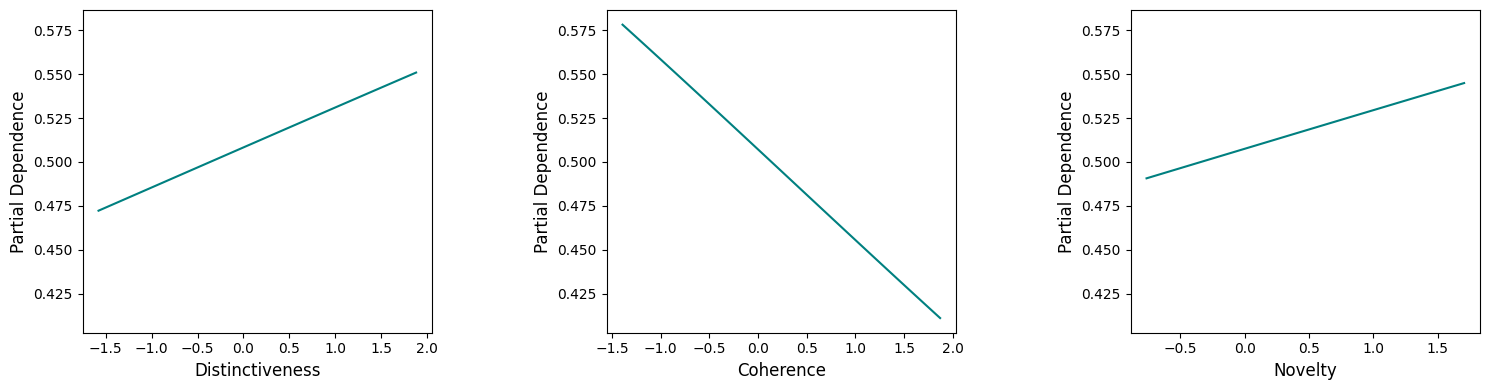

In [125]:
features_to_plot = ['distinctiveness', 'coherence', 'novelty']
new_labels = ['Distinctiveness', 'Coherence', 'Novelty']

font = {'size': 12}

fig, ax = plt.subplots(figsize=(15, 4), nrows=1, ncols=3)

disp = PartialDependenceDisplay.from_estimator(
    model, 
    X_train_scaled_df, 
    features=features_to_plot, 
    ax=ax, 
    grid_resolution=50,
    line_kw={"color": "teal"}
)

for i in range(len(features_to_plot)):
    plt.setp(disp.deciles_vlines_[i], visible=False)

for i, feature in enumerate(features_to_plot):
    ax[i].set_title('')
    ax[i].set_xlabel(new_labels[i], fontdict=font)
    ax[i].set_ylabel("Partial Dependence", fontdict=font)

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
# plt.savefig('PDP single.jpg', dpi=600)
plt.show()


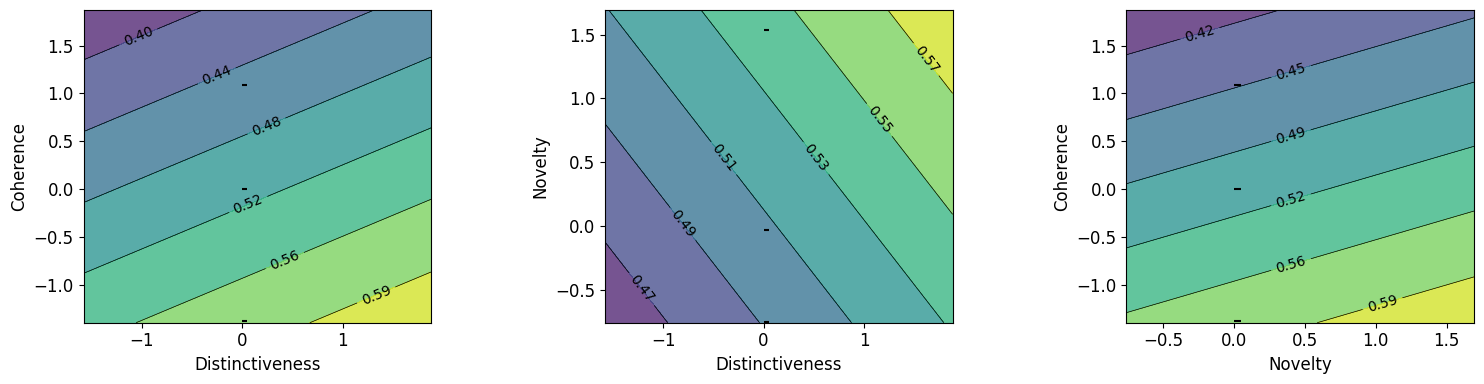

In [109]:
interactions_to_plot = [
    ('Distinctiveness', 'Coherence'),
    ('Distinctiveness', 'Novelty'),
    ('Novelty', 'Coherence')
]

font = {'size': 12}

fig, ax = plt.subplots(figsize=(15, 4), nrows=1, ncols=3)
for i, (feat1, feat2) in enumerate(interactions_to_plot):
    disp = PartialDependenceDisplay.from_estimator(
        model, 
        X_train_scaled_df, 
        features=[(feat1, feat2)],
        kind='average',
        ax=ax[i],
        grid_resolution=20
    )
    plt.setp(disp.deciles_vlines_, visible=False)
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
# plt.savefig('PDP interactions.jpg', dpi=600)
plt.show()

In [46]:
# Random Forest

X = results2[['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length',
             'campaign_duration', 'parentCategory_name', 'coherence2', 'distinctiveness2', 'novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']]
X = pd.get_dummies(X, columns=['parentCategory_name'], drop_first=True)
y = results2['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=300, class_weight='balanced', max_depth=20, min_samples_leaf=10,max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

f1 = f1_score(y_test, y_pred_rf)
print("Random Forest F1-Score:", f1)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest F1-Score: 0.7665746868208346
Random Forest Accuracy: 0.755705486978967


In [47]:
# # Random Forest

# X = results2[['annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length', 'campaign_duration', 'parentCategory_name']]
# X = pd.get_dummies(X, columns=['parentCategory_name'], drop_first=True)
# y = results2['success']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# rf_model = RandomForestClassifier(n_estimators=300, class_weight='balanced', max_depth=20, min_samples_leaf=10,max_features='sqrt', random_state=42)
# rf_model.fit(X_train, y_train)
# y_pred_rf = rf_model.predict(X_test)

# f1 = f1_score(y_test, y_pred_rf)
# print("Random Forest F1-Score:", f1)
# print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest F1-Score: 0.7377022158381802
Random Forest Accuracy: 0.715326228628383


In [48]:
# # Random Forest

# X = results2[['distinctiveness', 'coherence', 'novelty', 'coherence2', 'distinctiveness2', 'novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']]
# y = results2['success']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# rf_model = RandomForestClassifier(n_estimators=300, class_weight='balanced', max_depth=20, min_samples_leaf=10,max_features='sqrt', random_state=42)
# rf_model.fit(X_train, y_train)
# y_pred_rf = rf_model.predict(X_test)

# f1 = f1_score(y_test, y_pred_rf)
# print("Random Forest F1-Score:", f1)
# print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest F1-Score: 0.7093664943691163
Random Forest Accuracy: 0.7025479823149071


<function matplotlib.pyplot.show(close=None, block=None)>

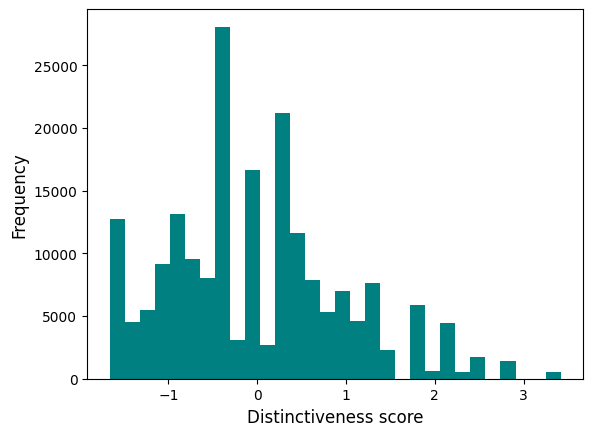

In [29]:
plt.hist(results2.distinctiveness, bins = 30, color= "teal")

font = {'size': 12}
plt.xlabel('Distinctiveness score', fontdict=font)
plt.ylabel('Frequency', fontdict=font)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# plt.savefig('a.png', dpi=600)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

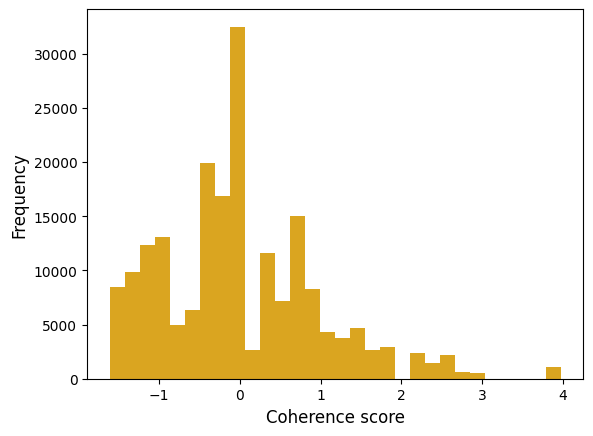

In [30]:
plt.hist(results2.coherence, bins = 30, color = 'goldenrod')

font = {'size': 12}
plt.xlabel('Coherence score', fontdict=font)
plt.ylabel('Frequency', fontdict=font)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# plt.savefig('b.png', dpi=600)
plt.show

In [108]:
results2 = results.copy()

scaler = StandardScaler()
columns_to_standardize = ['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length','campaign_duration']
results2[columns_to_standardize] = scaler.fit_transform(results2[columns_to_standardize])

results2['coherence2'] = results2['coherence']**2
results2['distinctiveness2'] = results2['distinctiveness']**2
results2['novelty2'] = results2['novelty']**2
results2['dis_coh_interaction'] = results2['distinctiveness'] * results2['coherence']
results2['dis_nov_interaction'] = results2['distinctiveness'] * results2['novelty']
results2['nov_coh_interaction'] = results2['novelty'] * results2['coherence']

# Logistic Regression

X = results2[['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length',
             'campaign_duration', 'parentCategory_name', 'coherence2', 'distinctiveness2', 'novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']]
X = pd.get_dummies(X, columns=['parentCategory_name'], drop_first = True)
y = results2['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

continuous_columns = ['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length', 'campaign_duration',
                      'coherence2', 'distinctiveness2', 'novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']
dummy_columns = [col for col in X_train.columns if col not in continuous_columns]
sc = StandardScaler()
X_train_continuous = sc.fit_transform(X_train[continuous_columns])
X_test_continuous = sc.transform(X_test[continuous_columns])
X_train_dummy = X_train[dummy_columns].values
X_test_dummy = X_test[dummy_columns].values
X_train_scaled = np.hstack((X_train_continuous, X_train_dummy))
X_test_scaled = np.hstack((X_test_continuous, X_test_dummy))
all_columns = continuous_columns + dummy_columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=all_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=all_columns)

# model = LogisticRegression(class_weight='balanced')
model = LogisticRegression(max_iter=500, C=1, solver='lbfgs', penalty='l2', tol=0.0001, class_weight='balanced')
model.fit(X_train_scaled_df, y_train)

y_pred = model.predict(X_test_scaled_df)

f1 = f1_score(y_test, y_pred)
print("Logistic Regression F1-Score:", f1)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

Logistic Regression F1-Score: 0.7283570510800261
Logistic Regression Accuracy: 0.7136395001150042


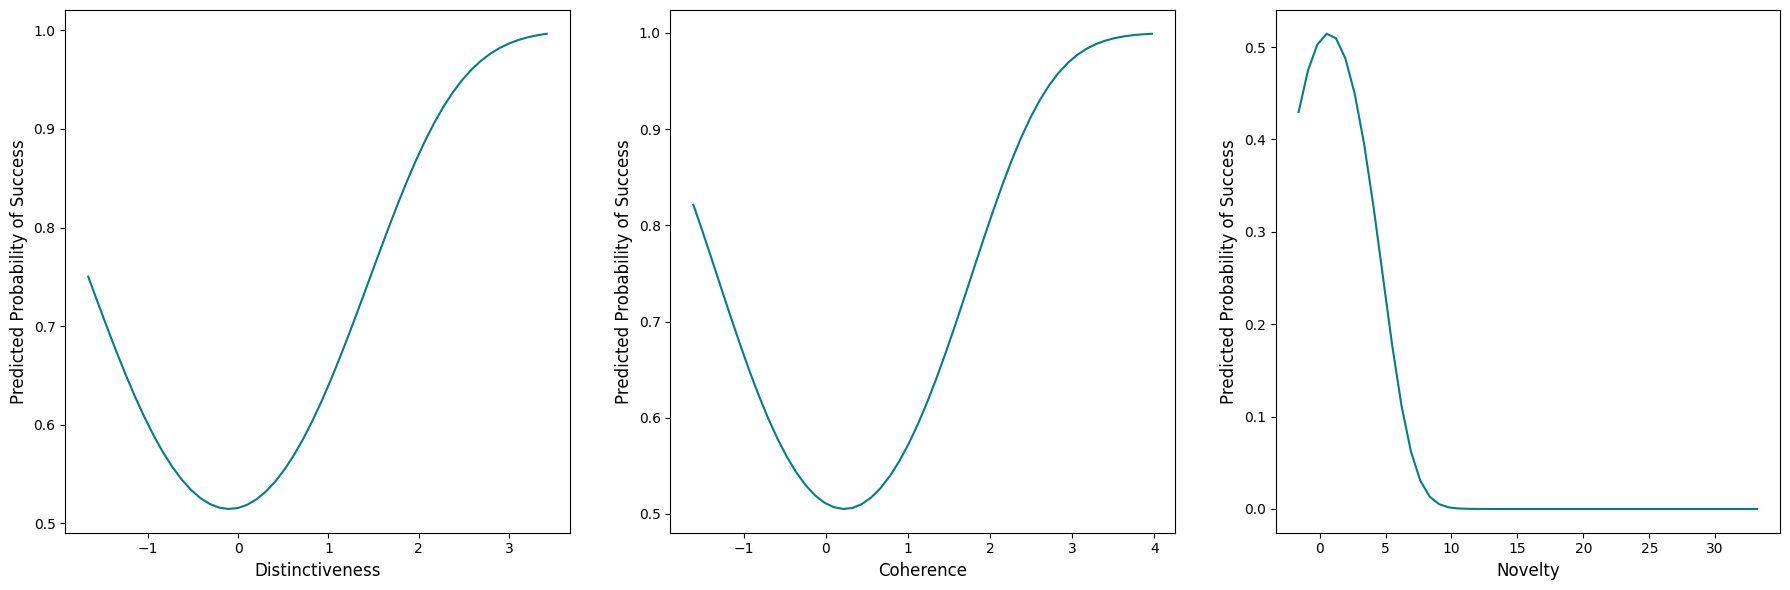

In [73]:
# import numpy as np
# import matplotlib.pyplot as plt

# def compute_pdp(var, model, X_train, num_points=50):
#     # Create a grid in standardized space based on the range in X_train
#     min_scaled = X_train[var].min()
#     max_scaled = X_train[var].max()
#     grid_scaled = np.linspace(min_scaled, max_scaled, num_points)
    
#     # Define the squared term and interaction terms for this variable
#     squared_term = var + '2'
#     # Updated interaction term identification
#     interaction_terms = [col for col in X_train.columns 
#                          if '_interaction' in col and var in col.split('_') and col != squared_term]
    
#     # List of features to update
#     features_to_set = [var, squared_term] + interaction_terms
    
#     # Compute partial dependence
#     pd_values = []
#     for d_scaled in grid_scaled:
#         # Create a copy of the training data
#         X_temp = X_train.copy()
        
#         # Update the main variable
#         X_temp[var] = d_scaled
        
#         # Update the squared term
#         X_temp[squared_term] = d_scaled ** 2
        
#         # Update interaction terms
#         for inter_term in interaction_terms:
#             # Extract the other variable in the interaction
#             other_var = [v for v in inter_term.split('_') 
#                          if v != var and v != 'interaction' and v not in ['dis', 'coh', 'nov']][0]
#             X_temp[inter_term] = d_scaled * X_train[other_var]
        
#         # Predict probabilities and average them
#         probs = model.predict_proba(X_temp)[:, 1]  # Probability of the positive class
#         pd_values.append(np.mean(probs))
    
#     return grid_scaled, pd_values

# # Assuming 'model' and 'X_train_scaled_df' (standardized training data) are defined
# variables = ['distinctiveness', 'coherence', 'novelty']
# new_labels = ['Distinctiveness', 'Coherence', 'Novelty']

# # Set up the plot
# font = {'size': 12}
# fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# # Compute and plot PDP for each variable
# for i, var in enumerate(variables):
#     grid_scaled, pd_values = compute_pdp(var, model, X_train_scaled_df)
#     axes[i].plot(grid_scaled, pd_values, color='teal')
#     axes[i].set_xlabel(new_labels[i], fontdict=font)
#     axes[i].set_ylabel('Predicted Probability of Success', fontdict=font)

# plt.tight_layout()
# plt.subplots_adjust(wspace=0.2)
# plt.savefig('PDP single 2.jpg', dpi=600)
# plt.show()

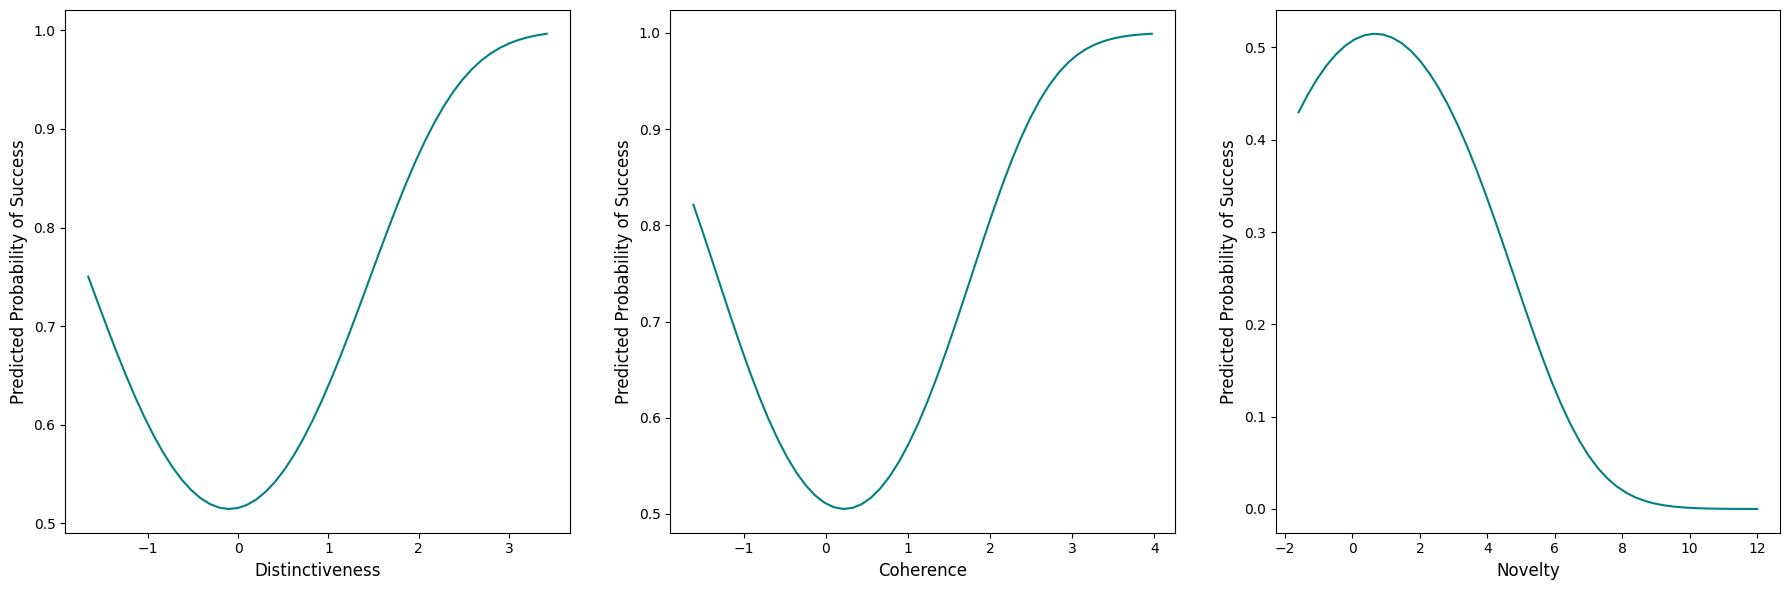

In [109]:
# same 1D plot but with rescaled novelty

def compute_pdp(var, model, X_train, num_points=50):
    # Create a grid in standardized space with customized range for 'Novelty'
    min_scaled = X_train[var].min()
    if var == 'novelty':
        max_scaled = min(X_train[var].max(), 12)
    else:
        max_scaled = X_train[var].max()
    grid_scaled = np.linspace(min_scaled, max_scaled, num_points)
    
    # Define the squared term and interaction terms for this variable
    squared_term = var + '2'
    # Updated interaction term identification
    interaction_terms = [col for col in X_train.columns 
                         if '_interaction' in col and var in col.split('_') and col != squared_term]
    
    # List of features to update
    features_to_set = [var, squared_term] + interaction_terms
    
    # Compute partial dependence
    pd_values = []
    for d_scaled in grid_scaled:
        # Create a copy of the training data
        X_temp = X_train.copy()
        
        # Update the main variable
        X_temp[var] = d_scaled
        
        # Update the squared term
        X_temp[squared_term] = d_scaled ** 2
        
        # Update interaction terms
        for inter_term in interaction_terms:
            # Extract the other variable in the interaction
            other_var = [v for v in inter_term.split('_') 
                         if v != var and v != 'interaction' and v not in ['dis', 'coh', 'nov']][0]
            X_temp[inter_term] = d_scaled * X_train[other_var]
        
        # Predict probabilities and average them
        probs = model.predict_proba(X_temp)[:, 1]  # Probability of the positive class
        pd_values.append(np.mean(probs))
    
    return grid_scaled, pd_values

# Assuming 'model' and 'X_train_scaled_df' (standardized training data) are defined
variables = ['distinctiveness', 'coherence', 'novelty']
new_labels = ['Distinctiveness', 'Coherence', 'Novelty']

# Set up the plot
font = {'size': 12}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Compute and plot PDP for each variable
for i, var in enumerate(variables):
    grid_scaled, pd_values = compute_pdp(var, model, X_train_scaled_df)
    axes[i].plot(grid_scaled, pd_values, color='teal')
    axes[i].set_xlabel(new_labels[i], fontdict=font)
    axes[i].set_ylabel('Predicted Probability of Success', fontdict=font)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
# plt.savefig('PDP_single_2.jpg', dpi=600)
plt.show()

In [110]:
results2 = results.copy()

scaler = StandardScaler()
columns_to_standardize = ['distinctiveness', 'coherence', 'novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length','campaign_duration']
results2[columns_to_standardize] = scaler.fit_transform(results2[columns_to_standardize])

results2['Coherence2'] = results2['coherence']**2
results2['Distinctiveness2'] = results2['distinctiveness']**2
results2['Novelty2'] = results2['novelty']**2
results2['dis_coh_interaction'] = results2['distinctiveness'] * results2['coherence']
results2['dis_nov_interaction'] = results2['distinctiveness'] * results2['novelty']
results2['nov_coh_interaction'] = results2['novelty'] * results2['coherence']

results2 = results2.rename(columns={"distinctiveness": "Distinctiveness", "coherence": "Coherence", "novelty": "Novelty"})

# Logistic Regression

X = results2[['Distinctiveness', 'Coherence', 'Novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length',
             'campaign_duration', 'parentCategory_name', 'Coherence2', 'Distinctiveness2', 'Novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']]
X = pd.get_dummies(X, columns=['parentCategory_name'], drop_first = True)
y = results2['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

continuous_columns = ['Distinctiveness', 'Coherence', 'Novelty', 'annual_cycles_sine', 'annual_cycles_cosine', 'goal_log', 'log_des_length', 'campaign_duration',
                      'Coherence2', 'Distinctiveness2', 'Novelty2', 'dis_coh_interaction', 'dis_nov_interaction', 'nov_coh_interaction']
dummy_columns = [col for col in X_train.columns if col not in continuous_columns]
sc = StandardScaler()
X_train_continuous = sc.fit_transform(X_train[continuous_columns])
X_test_continuous = sc.transform(X_test[continuous_columns])
X_train_dummy = X_train[dummy_columns].values
X_test_dummy = X_test[dummy_columns].values
X_train_scaled = np.hstack((X_train_continuous, X_train_dummy))
X_test_scaled = np.hstack((X_test_continuous, X_test_dummy))
all_columns = continuous_columns + dummy_columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=all_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=all_columns)

# model = LogisticRegression(class_weight='balanced')
model = LogisticRegression(max_iter=500, C=1, solver='lbfgs', penalty='l2', tol=0.0001, class_weight='balanced')
model.fit(X_train_scaled_df, y_train)

y_pred = model.predict(X_test_scaled_df)

f1 = f1_score(y_test, y_pred)
print("Logistic Regression F1-Score:", f1)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

Logistic Regression F1-Score: 0.7283570510800261
Logistic Regression Accuracy: 0.7136395001150042


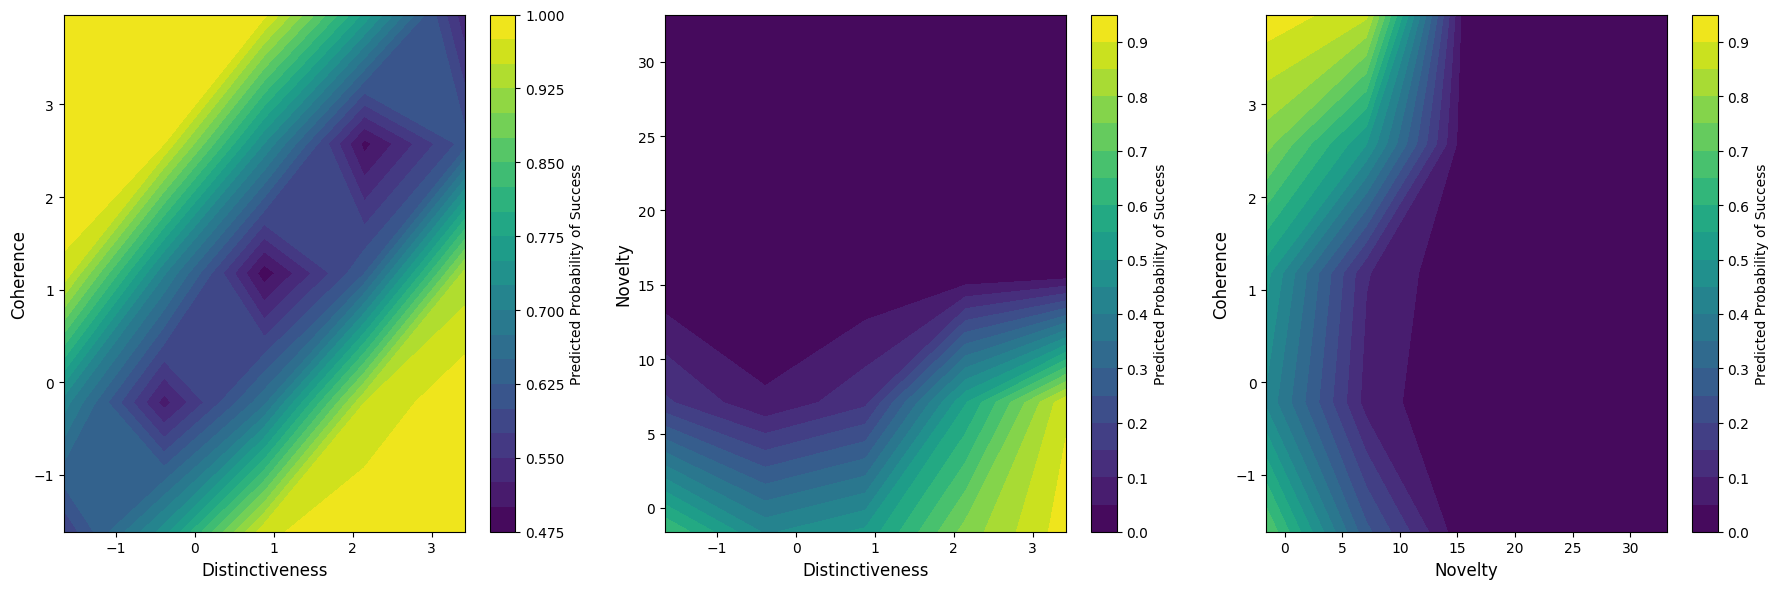

In [81]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Mapping from interaction term abbreviations to full variable names
# abbrev_to_full = {
#     'dis': 'Distinctiveness',
#     'coh': 'Coherence',
#     'nov': 'Novelty'
# }

# def get_vars_from_interaction(interaction):
#     """Extract the two full variable names from an interaction term."""
#     parts = interaction.split('_')
#     vars_abbrev = [part for part in parts if part in abbrev_to_full]
#     return [abbrev_to_full[abbrev] for abbrev in vars_abbrev]

# def compute_2d_pdp(interaction, var1, var2, model, X_train, num_points=5):
#     """Compute 2D partial dependence values for an interaction term."""
#     # Create a meshgrid for the two variables over their standardized ranges
#     grid_var1 = np.linspace(X_train[var1].min(), X_train[var1].max(), num_points)
#     grid_var2 = np.linspace(X_train[var2].min(), X_train[var2].max(), num_points)
#     grid_var1, grid_var2 = np.meshgrid(grid_var1, grid_var2)
    
#     # Array to store partial dependence values
#     pd_values = np.zeros_like(grid_var1)
    
#     # Identify squared terms and other interaction terms in the dataset
#     squared_terms = [var + '2' for var in [var1, var2] if var + '2' in X_train.columns]
#     other_interactions = [col for col in X_train.columns 
#                           if 'interaction' in col and col != interaction]
    
#     # Loop over the grid to compute partial dependence
#     for i in range(num_points):
#         for j in range(num_points):
#             val1 = grid_var1[i, j]
#             val2 = grid_var2[i, j]
#             X_temp = X_train.copy()
#             # Update the two variables being varied
#             X_temp[var1] = val1
#             X_temp[var2] = val2
#             # Update squared terms if they exist
#             if var1 + '2' in squared_terms:
#                 X_temp[var1 + '2'] = val1 ** 2
#             if var2 + '2' in squared_terms:
#                 X_temp[var2 + '2'] = val2 ** 2
#             # Update the main interaction term
#             X_temp[interaction] = val1 * val2
#             # Update other interactions involving var1 or var2
#             for other_inter in other_interactions:
#                 vars_in_inter = get_vars_from_interaction(other_inter)
#                 if var1 in vars_in_inter:
#                     other_var = [v for v in vars_in_inter if v != var1][0]
#                     X_temp[other_inter] = val1 * X_train[other_var]
#                 elif var2 in vars_in_inter:
#                     other_var = [v for v in vars_in_inter if v != var2][0]
#                     X_temp[other_inter] = val2 * X_train[other_var]
#             # Compute the average predicted probability
#             probs = model.predict_proba(X_temp)[:, 1]
#             pd_values[i, j] = np.mean(probs)
    
#     return grid_var1, grid_var2, pd_values

# # Define the interactions to plot
# interactions = [
#     ('dis_coh_interaction', 'Distinctiveness', 'Coherence'),
#     ('dis_nov_interaction', 'Distinctiveness', 'Novelty'),
#     ('nov_coh_interaction', 'Novelty', 'Coherence')
# ]

# # Create a figure with three subplots
# fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# font = {'size': 12}

# # Generate and plot 2D PDPs for each interaction
# for i, (interaction, var1, var2) in enumerate(interactions):
#     # Compute partial dependence
#     grid_var1, grid_var2, pd_values = compute_2d_pdp(interaction, var1, var2, model, X_train_scaled_df)
#     ax = axes[i]
#     # Create a filled contour plot
#     contour = ax.contourf(grid_var1, grid_var2, pd_values, levels=20, cmap='viridis')
#     # Label axes and title
#     ax.set_xlabel(f'{var1}', fontdict=font)
#     ax.set_ylabel(f'{var2}', fontdict=font)
#     fig.colorbar(contour, ax=ax, label='Predicted Probability of Success')

# plt.tight_layout()
# plt.subplots_adjust(wspace=0.2)
# # plt.savefig('PDP interactions 2.jpg', dpi=600)
# plt.show()

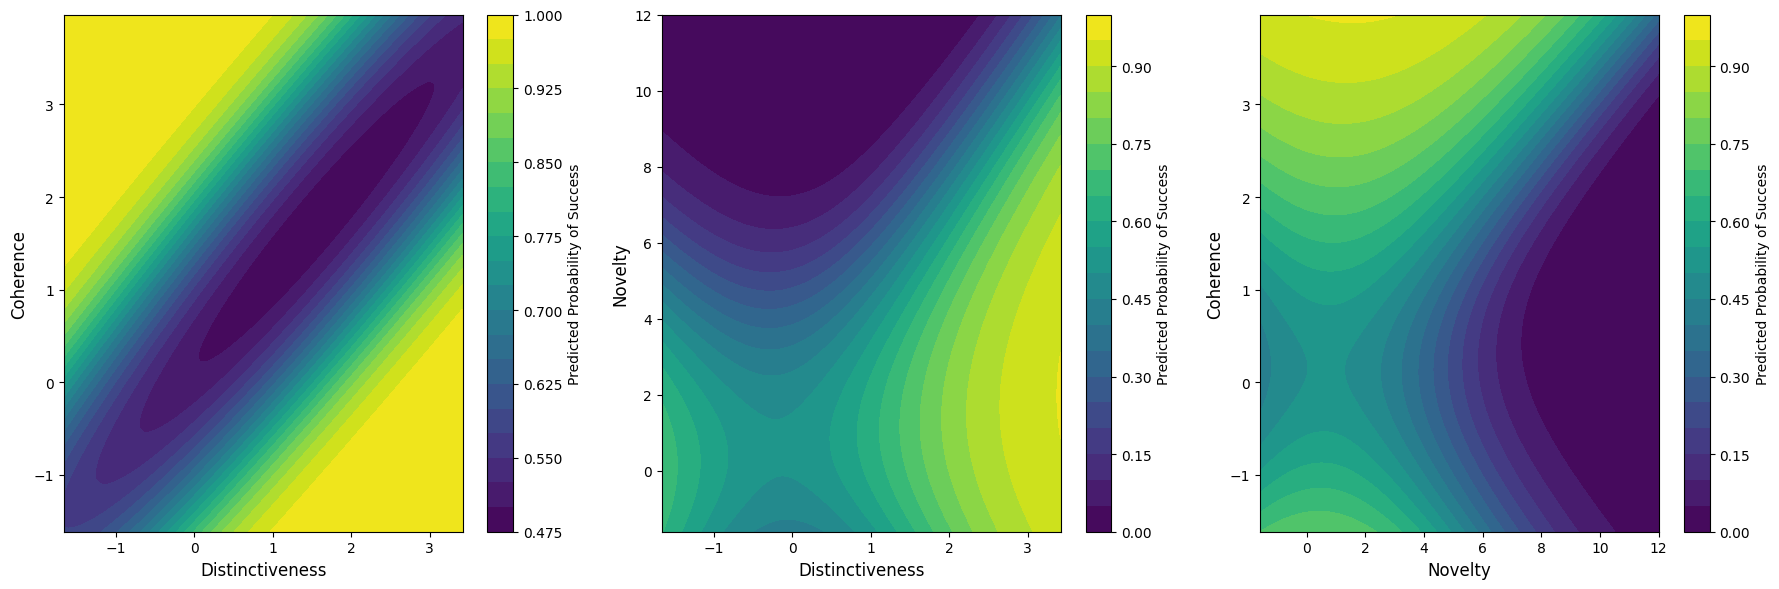

In [112]:
# same 2D plot but with rescaled novelty

abbrev_to_full = {
    'dis': 'Distinctiveness',
    'coh': 'Coherence',
    'nov': 'Novelty'
}

def get_vars_from_interaction(interaction):
    """Extract the two full variable names from an interaction term."""
    parts = interaction.split('_')
    vars_abbrev = [part for part in parts if part in abbrev_to_full]
    return [abbrev_to_full[abbrev] for abbrev in vars_abbrev]

def compute_2d_pdp(interaction, var1, var2, model, X_train, num_points=5):
    """Compute 2D partial dependence values for an interaction term."""
    # Create a meshgrid for the two variables with customized ranges
    if var1 == 'Novelty':
        grid_var1 = np.linspace(X_train[var1].min(), min(X_train[var1].max(), 12), num_points)
    else:
        grid_var1 = np.linspace(X_train[var1].min(), X_train[var1].max(), num_points)
    
    if var2 == 'Novelty':
        grid_var2 = np.linspace(X_train[var2].min(), min(X_train[var2].max(), 12), num_points)
    else:
        grid_var2 = np.linspace(X_train[var2].min(), X_train[var2].max(), num_points)
    
    grid_var1, grid_var2 = np.meshgrid(grid_var1, grid_var2)
    
    # Array to store partial dependence values
    pd_values = np.zeros_like(grid_var1)
    
    # Identify squared terms and other interaction terms in the dataset
    squared_terms = [var + '2' for var in [var1, var2] if var + '2' in X_train.columns]
    other_interactions = [col for col in X_train.columns 
                          if 'interaction' in col and col != interaction]
    
    # Loop over the grid to compute partial dependence
    for i in range(num_points):
        for j in range(num_points):
            val1 = grid_var1[i, j]
            val2 = grid_var2[i, j]
            X_temp = X_train.copy()
            # Update the two variables being varied
            X_temp[var1] = val1
            X_temp[var2] = val2
            # Update squared terms if they exist
            if var1 + '2' in squared_terms:
                X_temp[var1 + '2'] = val1 ** 2
            if var2 + '2' in squared_terms:
                X_temp[var2 + '2'] = val2 ** 2
            # Update the main interaction term
            X_temp[interaction] = val1 * val2
            # Update other interactions involving var1 or var2
            for other_inter in other_interactions:
                vars_in_inter = get_vars_from_interaction(other_inter)
                if var1 in vars_in_inter:
                    other_var = [v for v in vars_in_inter if v != var1][0]
                    X_temp[other_inter] = val1 * X_train[other_var]
                elif var2 in vars_in_inter:
                    other_var = [v for v in vars_in_inter if v != var2][0]
                    X_temp[other_inter] = val2 * X_train[other_var]
            # Compute the average predicted probability
            probs = model.predict_proba(X_temp)[:, 1]
            pd_values[i, j] = np.mean(probs)
    
    return grid_var1, grid_var2, pd_values

# Define the interactions to plot
interactions = [
    ('dis_coh_interaction', 'Distinctiveness', 'Coherence'),
    ('dis_nov_interaction', 'Distinctiveness', 'Novelty'),
    ('nov_coh_interaction', 'Novelty', 'Coherence')
]

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
font = {'size': 12}

# Generate and plot 2D PDPs for each interaction
for i, (interaction, var1, var2) in enumerate(interactions):
    # Compute partial dependence
    grid_var1, grid_var2, pd_values = compute_2d_pdp(interaction, var1, var2, model, X_train_scaled_df)
    ax = axes[i]
    # Create a filled contour plot
    contour = ax.contourf(grid_var1, grid_var2, pd_values, levels=20, cmap='viridis')
    # Label axes and title
    ax.set_xlabel(f'{var1}', fontdict=font)
    ax.set_ylabel(f'{var2}', fontdict=font)
    fig.colorbar(contour, ax=ax, label='Predicted Probability of Success')

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
# plt.savefig('PDP_interactions_2.jpg', dpi=600)
plt.show()